In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
from google.colab import drive # Google IPython notebook 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/au?client_id=.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20htwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
Mounted at /content/gdrive


In [4]:
data=pd.read_csv('gdrive/My Drive/Colab Notebooks/Preprocessed_data_for_EDA.csv')
data.head(2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_id,name,price,website_id,sku,url,brand,media,description_text,Unnamed: 9,Unnamed: 10
0,5c3c9525a0399e27dfda4312,ASOS DESIGN long sleeve oversized shirt in abs...,"{'offer_price': {'currency': 'GBP', 'value': 2...",5bc055046264490004432328,1323442,https://www.asos.com/asos-design/asos-design-l...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...","Colourful, abstract satellite print It’s an ey...",NaN,NaN
1,5c3c9525a0399e27dfda4313,ASOS DESIGN lounge pant in NFL design,"{'offer_price': {'currency': 'GBP', 'value': 1...",5bc055046264490004432328,1374261,https://www.asos.com/asos-design/asos-design-l...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...",Best paired with cancelled Friday night plans ...,NaN,NaN


*  ".head()" function of pandas library which returns first five observations of the data set.Similarly ".tail()" returns last five observations of the data set.

In [0]:
data.isnull().sum()

_id                      0
name                     0
price                    0
website_id               0
sku                    122
url                      0
brand                    0
media                    0
description_text       433
Unnamed: 9          242145
Unnamed: 10         242162
dtype: int64

In [0]:
print(data.shape)
print(len(data['sku'].unique().tolist()))

(242254, 11)
238637


1.   **SKU (Stock keeping Unit)** is having 122 Null values
2.   **Unnamed 09** is having 242145 Null values,Therefore we will drop it
3.   **Unnamed 10**: is having 242162 Null values,Therefore we will drop it
4.   **description_text** is having 433 Null values, filled with **NOT AVAILABLE** text





In [0]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242254 entries, 0 to 242253
Data columns (total 11 columns):
_id                 242254 non-null object
name                242254 non-null object
price               242254 non-null object
website_id          242254 non-null object
sku                 242132 non-null object
url                 242254 non-null object
brand               242254 non-null object
media               242254 non-null object
description_text    241821 non-null object
Unnamed: 9          109 non-null object
Unnamed: 10         92 non-null object
dtypes: object(11)
memory usage: 20.3+ MB
None


In [0]:
data["description_text"].fillna("NOT AVAILABLE", inplace = True)  

In [0]:
data.isnull().sum()

_id                      0
name                     0
price                    0
website_id               0
sku                    122
url                      0
brand                    0
media                    0
description_text         0
Unnamed: 9          242145
Unnamed: 10         242162
dtype: int64

In [0]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head(2)

,_id,name,price,website_id,sku,url,brand,media,description_text
0,5c3c9525a0399e27dfda4312,ASOS DESIGN long sleeve oversized shirt in abs...,"{'offer_price': {'currency': 'GBP', 'value': 2...",5bc055046264490004432328,1323442,https://www.asos.com/asos-design/asos-design-l...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...","Colourful, abstract satellite print It’s an ey..."
1,5c3c9525a0399e27dfda4313,ASOS DESIGN lounge pant in NFL design,"{'offer_price': {'currency': 'GBP', 'value': 1...",5bc055046264490004432328,1374261,https://www.asos.com/asos-design/asos-design-l...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...",Best paired with cancelled Friday night plans ...


* Data has only object and integer values.
* No variable column has null/missing values.

In [0]:
first=data['price']
print(type(first))
# print(first)

<class 'pandas.core.series.Series'>


In [0]:
value=[]
import re
for i in first:
    temp = re.findall(r"[-+]?\d*\.\d+|\d+", i) 
    str(value.append(temp))

In [0]:
print(value)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
df=pd.DataFrame(value,columns=['offer_price', 'regular_price','_price'])
df.head()

,offer_price,regular_price,_price
0,22.0,28.0,None
1,10.5,18.0,None
2,36.0,36.0,None
3,18.0,30.0,None
4,5.5,14.0,None


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242254 entries, 0 to 242253
Data columns (total 3 columns):
offer_price      242134 non-null object
regular_price    242119 non-null object
_price           89590 non-null object
dtypes: object(3)
memory usage: 5.5+ MB


In [0]:
df.isnull().sum()

offer_price         120
regular_price       135
_price           152664
dtype: int64

In [0]:
df.describe()

,offer_price,regular_price,_price
count,242134,242119,89590
unique,3980,4037,3527
top,6.0,25.0,155.0
freq,6172,10613,757


**_price** is only consisting 36.981% value of the entire data set therefore dropping it  

In [0]:
df=df.drop(['_price'],axis=1)

* .drop function of pandas library which drop the specified column of the DataFrame

In [0]:
df.head(2)

,offer_price,regular_price
0,22.0,28.0
1,10.5,18.0


In [0]:
df.fillna(df.mean()) 

,offer_price,regular_price
0,22.0,28.0
1,10.5,18.0
2,36.0,36.0
3,18.0,30.0
4,5.5,14.0
...,...,...
242249,8.0,8.0
242250,5.0,15.0
242251,32.0,38.0
242252,48.0,55.0


In [0]:
# df = df.astype(str).astype(float)

df[["offer_price", "regular_price"]] = df[["offer_price", "regular_price"]].apply(pd.to_numeric,errors='ignore')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242254 entries, 0 to 242253
Data columns (total 2 columns):
offer_price      242134 non-null float64
regular_price    242119 non-null float64
dtypes: float64(2)
memory usage: 3.7 MB


In [0]:
data=data.drop(['price'],axis=1)
d=pd.concat([data,df],axis=1)
d.head(2)

,_id,name,website_id,sku,url,brand,media,description_text,offer_price,regular_price
0,5c3c9525a0399e27dfda4312,ASOS DESIGN long sleeve oversized shirt in abs...,5bc055046264490004432328,1323442,https://www.asos.com/asos-design/asos-design-l...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...","Colourful, abstract satellite print It’s an ey...",22.0,28.0
1,5c3c9525a0399e27dfda4313,ASOS DESIGN lounge pant in NFL design,5bc055046264490004432328,1374261,https://www.asos.com/asos-design/asos-design-l...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...",Best paired with cancelled Friday night plans ...,10.5,18.0


### 1:) Records with empty "_id" are invalid records. removing them before any analysis.

In [0]:
print(d.shape)
print(len(d['_id'].unique().tolist()))

(242254, 10)
242254


In [0]:
data=d.drop(['_id'],axis=1)
data.head(2)

,name,website_id,sku,url,brand,media,description_text,offer_price,regular_price
0,ASOS DESIGN long sleeve oversized shirt in abs...,5bc055046264490004432328,1323442,https://www.asos.com/asos-design/asos-design-l...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...","Colourful, abstract satellite print It’s an ey...",22.0,28.0
1,ASOS DESIGN lounge pant in NFL design,5bc055046264490004432328,1374261,https://www.asos.com/asos-design/asos-design-l...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...",Best paired with cancelled Friday night plans ...,10.5,18.0


### 2:) Discard records with offer_price greater than regular price

In [0]:
data['col3'] = np.where((data['offer_price'] > data['regular_price']),'0', '1')   
# [ '0':'yes',  '1':'no']

In [0]:
data.head(2)

,name,website_id,sku,url,brand,media,description_text,offer_price,regular_price,col3
0,ASOS DESIGN long sleeve oversized shirt in abs...,5bc055046264490004432328,1323442,https://www.asos.com/asos-design/asos-design-l...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...","Colourful, abstract satellite print It’s an ey...",22.0,28.0,1
1,ASOS DESIGN lounge pant in NFL design,5bc055046264490004432328,1374261,https://www.asos.com/asos-design/asos-design-l...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...",Best paired with cancelled Friday night plans ...,10.5,18.0,1


In [0]:
data = data.dropna(subset=['col3'])

In [0]:
data

,name,website_id,sku,url,brand,media,description_text,offer_price,regular_price,col3
0,ASOS DESIGN long sleeve oversized shirt in abs...,5bc055046264490004432328,1323442,https://www.asos.com/asos-design/asos-design-l...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...","Colourful, abstract satellite print It’s an ey...",22.0,28.0,1
1,ASOS DESIGN lounge pant in NFL design,5bc055046264490004432328,1374261,https://www.asos.com/asos-design/asos-design-l...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...",Best paired with cancelled Friday night plans ...,10.5,18.0,1
2,BOSS 2 pack gift set trunks,5bc055046264490004432328,1359156,https://www.asos.com/boss/boss-2-pack-gift-set...,"{'name': 'boss', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...",Pack of two pairs We know you like options B...,36.0,36.0,1
3,ASOS DESIGN Tall tapered smart trouser in blac...,5bc055046264490004432328,1272918,https://www.asos.com/asos-design/asos-design-t...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...",For that thing you RSVPd to Concealed fly Func...,18.0,30.0,1
4,ASOS DESIGN Bridal Embroidered Lace Suspender,5bc055046264490004432328,1260385,https://www.asos.com/asos-design/asos-design-b...,"{'name': 'asos design', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://ima...",For date night and beyond Strap detail Secure ...,5.5,14.0,1
...,...,...,...,...,...,...,...,...,...,...
242249,Black Satin Knickers,5cff5e30e40f4900046735f8,cmf5953,https://www.prettylittlething.com/black-satin-...,"{'name': 'loccoapp', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://cdn...",We are obsessing over all things satin right n...,8.0,8.0,1
242250,Shape Red Vinyl One Shoulder Bodycon Dress,5cff5e30e40f4900046735f8,cme1792,https://www.prettylittlething.com/shape-red-vi...,"{'name': 'redlabel', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://cdn...",<strong>Shape Red Vinyl One Shoulder Bodycon D...,5.0,15.0,1
242251,Black Faux Suede High Double Platform Ankle Boots,5cff5e30e40f4900046735f8,cmf5663,https://www.prettylittlething.com/black-high-d...,"{'name': 'cityshoe', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://cdn...",These killer boots are the perfect addition to...,32.0,38.0,1
242252,Black Lace Up Cleated Flat Over The Knee Boot,5cff5e30e40f4900046735f8,cmc2810,https://www.prettylittlething.com/black-lace-u...,"{'name': 'indigo', 'sub_brand': ''}","{'standard': [{'order': 1, 'url': 'https://cdn...",Over the knee boots are everything this season...,48.0,55.0,1


### 3:) Analysis on text data 

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
set(stopwords.words('english'))
def clean_text(text, remove_stopwords = True):
    output = ""
    text = str(text).replace("\n", "")
#      Removing Punctuation
    text = re.sub(r'[^\w\s]','',text).lower() 
    if remove_stopwords:
        text = text.split(" ")
        for word in text:
            if word not in stopwords.words("english"):
                output = output + " " + word
    else:
        output = text
    return str(output.strip())[0:-3].replace("  ", " ")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [0]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

**Word CLoud**

In [0]:
from wordcloud import WordCloud, STOPWORDS 

####  A:) Name of the product:

In [0]:
df_name=data['name']
df_name.head()

0    ASOS DESIGN long sleeve oversized shirt in abs...
1                ASOS DESIGN lounge pant in NFL design
2                          BOSS 2 pack gift set trunks
3    ASOS DESIGN Tall tapered smart trouser in blac...
4        ASOS DESIGN Bridal Embroidered Lace Suspender
Name: name, dtype: object

In [0]:
texts = [] 
for line in df_name: 
    texts.append(clean_text(line))
df['name']=pd.DataFrame(texts,columns=['name'])
df.head()

,offer_price,regular_price,name
0,22.0,28.0,asos design long sleeve oversized shirt abstra...
1,10.5,18.0,asos design lounge pant nfl des
2,36.0,36.0,boss 2 pack gift set tru
3,18.0,30.0,asos design tall tapered smart trouser black s...
4,5.5,14.0,asos design bridal embroidered lace suspen


In [0]:
df['name'] = preprocess(df_name)
df.head()

,offer_price,regular_price,name
0,22.0,28.0,ASOS DESIGN long sleeve oversized shirt in abs...
1,10.5,18.0,ASOS DESIGN lounge pant in NFL design
2,36.0,36.0,BOSS 2 pack gift set trunks
3,18.0,30.0,ASOS DESIGN Tall tapered smart trouser in blac...
4,5.5,14.0,ASOS DESIGN Bridal Embroidered Lace Suspender


In [0]:
df['name_len'] = df['name'].astype(str).apply(len)
df['word_count'] = df['name'].apply(lambda x: len(str(x).split()))
df.tail()

,offer_price,regular_price,name,name_len,word_count
242249,8.0,8.0,Black Satin Knickers,20,3
242250,5.0,15.0,Shape Red Vinyl One Shoulder Bodycon Dress,42,7
242251,32.0,38.0,Black Faux Suede High Double Platform Ankle Boots,49,8
242252,48.0,55.0,Black Lace Up Cleated Flat Over The Knee Boot,45,9
242253,10.0,12.0,Scarlet Side Stripe Jersey Wide Leg Trouser,43,7


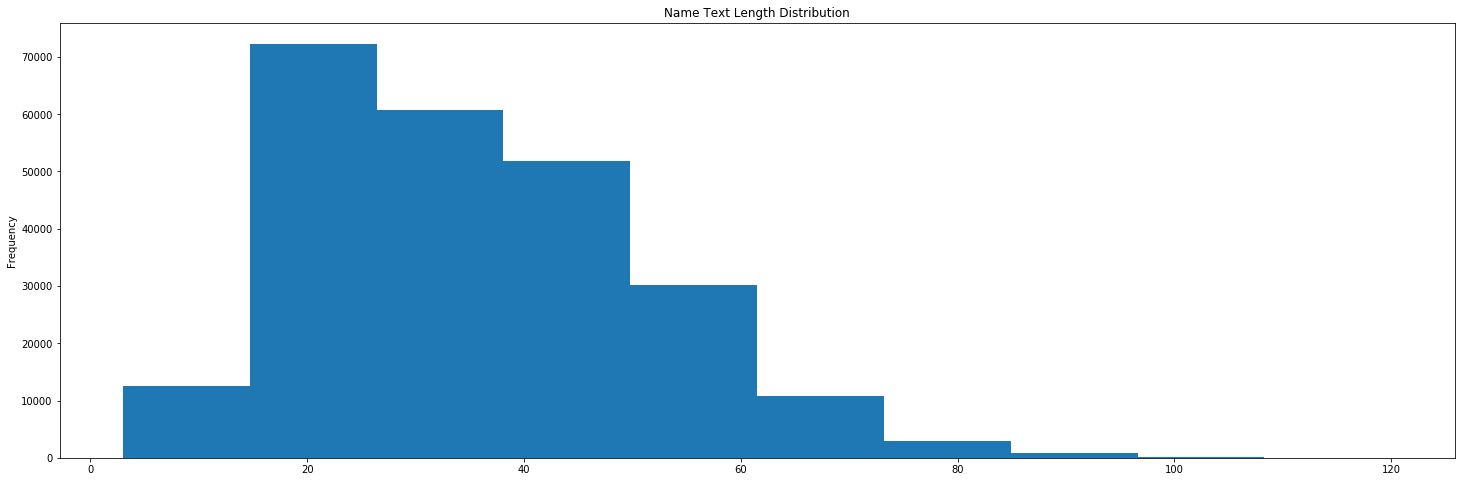

In [0]:
df['name_len'].plot(kind='hist',figsize=(25,8),title='Name Text Length Distribution')

in 52920
asos 32927
design 30081
shirt 27951
dress 26655
with 26032
black 24505
print 18833
top 15334
logo 13360
neck 11786
sleeve 11771
white 10229
detail 9604
jacket 9589
trousers 8547
fit 7965
long 7821
stripe 7488
lace 7430


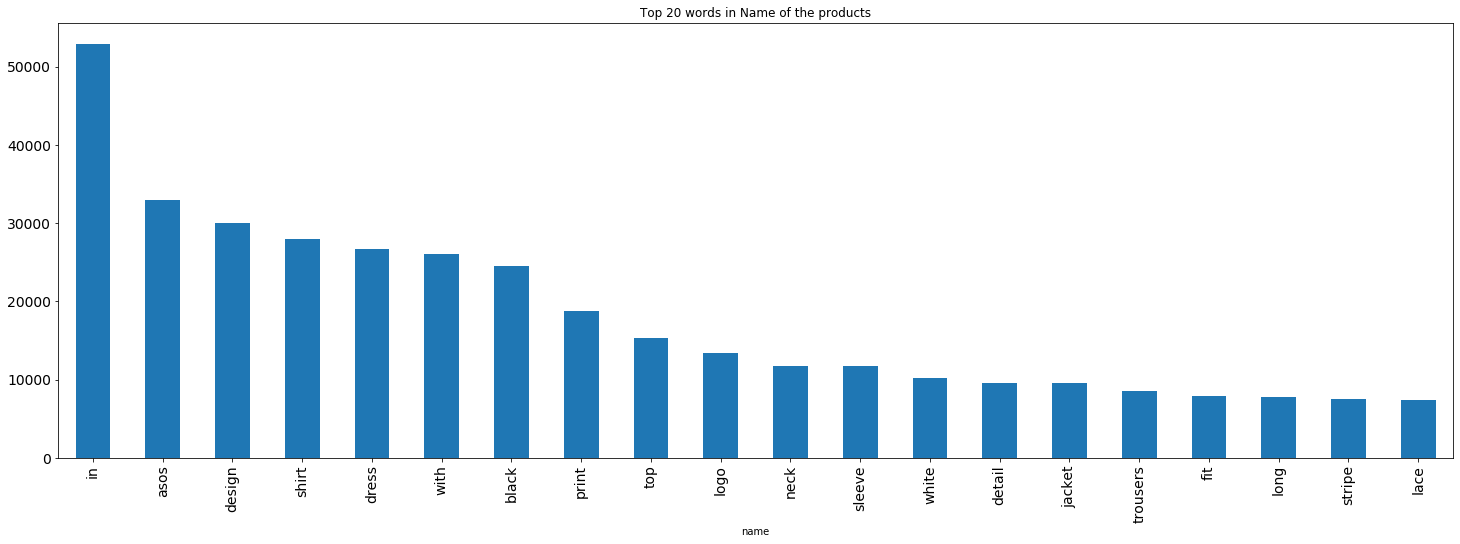

In [0]:
common_words = get_top_n_words(df['name'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['name' , 'count'])
df1.groupby('name').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',figsize=(25,8), title='Top 20 words in Name of the products',fontsize=14)

In [0]:
fre_word=pd.DataFrame(common_words,columns =['Names','frequency'])
fre_word.head(2)

,Names,frequency
0,in,52920
1,asos,32927


In [0]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in fre_word['Names']: 
    val = str(val)   
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()     
    for words in tokens: 
      comment_words = comment_words + words + ' '

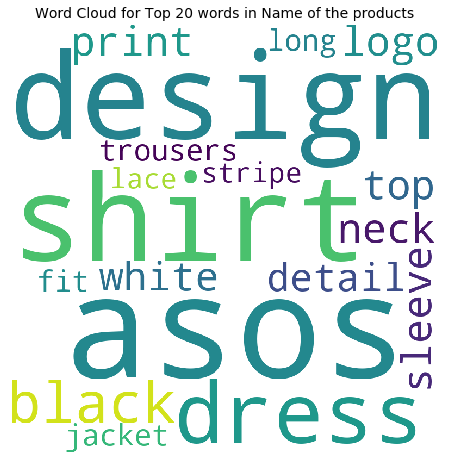

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('Word Cloud for Top 20 words in Name of the products',fontsize=14)
plt.axis("off") 
plt.show()

####  B:) Description of the Products

In [0]:
df_desc=data['description_text']
df_desc.tail()

242249    We are obsessing over all things satin right n...
242250    <strong>Shape Red Vinyl One Shoulder Bodycon D...
242251    These killer boots are the perfect addition to...
242252    Over the knee boots are everything this season...
242253    These trousers are a must-have for your everyd...
Name: description_text, dtype: object

In [0]:
texts = [] 
for line in df_desc: 
    texts.append(clean_text(line))
df['description_text']=pd.DataFrame(texts,columns=['description_text'])
df.head()

,offer_price,regular_price,name,name_len,word_count,description_text
0,22.0,28.0,ASOS DESIGN long sleeve oversized shirt in abs...,67,10,colourful abstract satellite print eyecatching...
1,10.5,18.0,ASOS DESIGN lounge pant in NFL design,37,7,best paired cancelled friday night plans elast...
2,36.0,36.0,BOSS 2 pack gift set trunks,27,6,pack two pairs know like options branded stret...
3,18.0,30.0,ASOS DESIGN Tall tapered smart trouser in blac...,77,13,thing rsvpd concealed fly functional pockets v...
4,5.5,14.0,ASOS DESIGN Bridal Embroidered Lace Suspender,45,6,date night beyond strap detail secure clips em...


In [0]:
df['desc_len'] = df['description_text'].astype(str).apply(len)
df['desc_word_count'] = df['description_text'].apply(lambda x: len(str(x).split()))
df.tail()

,offer_price,regular_price,name,name_len,word_count,description_text,desc_len,desc_word_count
242249,8.0,8.0,Black Satin Knickers,20,3,obsessing things satin right elevate underwear...,156,21
242250,5.0,15.0,Shape Red Vinyl One Shoulder Bodycon Dress,42,7,strongshape red vinyl one shoulder bodycon dre...,51,7
242251,32.0,38.0,Black Faux Suede High Double Platform Ankle Boots,49,8,killer boots perfect addition shoedrobe season...,164,23
242252,48.0,55.0,Black Lace Up Cleated Flat Over The Knee Boot,45,9,knee boots everything season style hitlist fea...,132,20
242253,10.0,12.0,Scarlet Side Stripe Jersey Wide Leg Trouser,43,7,trousers musthave everyday wardrobe doll featu...,149,22


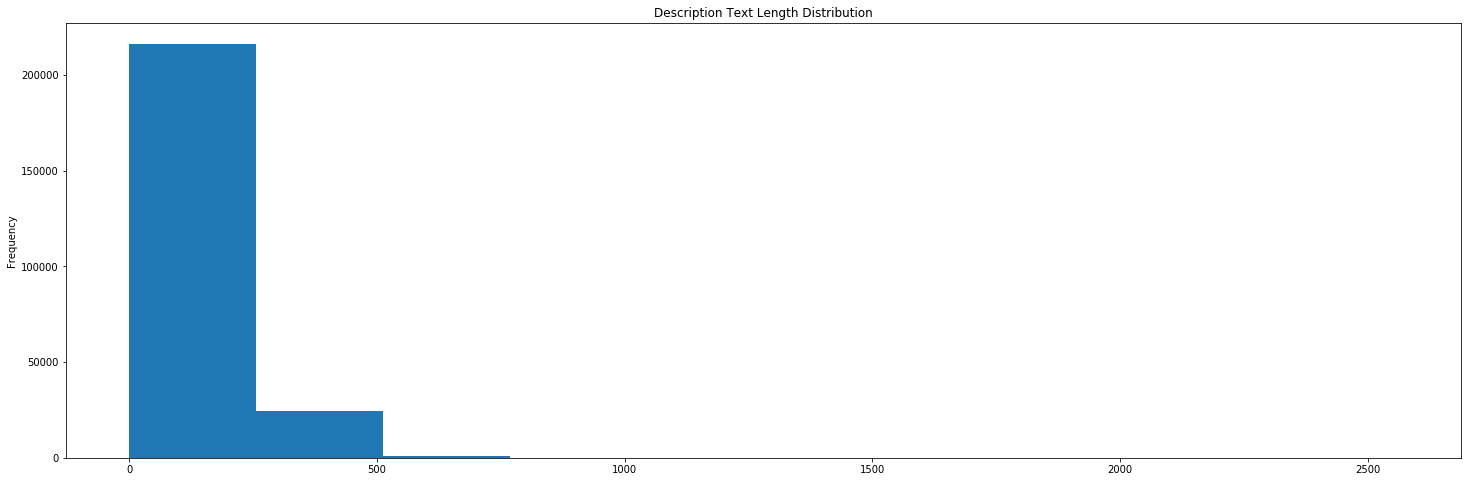

In [0]:
df['desc_len'].plot(kind='hist',figsize=(25,8),title='Description Text Length Distribution')

featuring 86023
fit 75500
design 52533
neck 48196
fastening 47706
sleeves 44369
front 42316
regular 40580
black 39467
logo 36897
pockets 33129
cut 31627
button 30910
look 30482
cotton 30266
style 30033
long 29642
zip 28175
print 27535
classic 26616


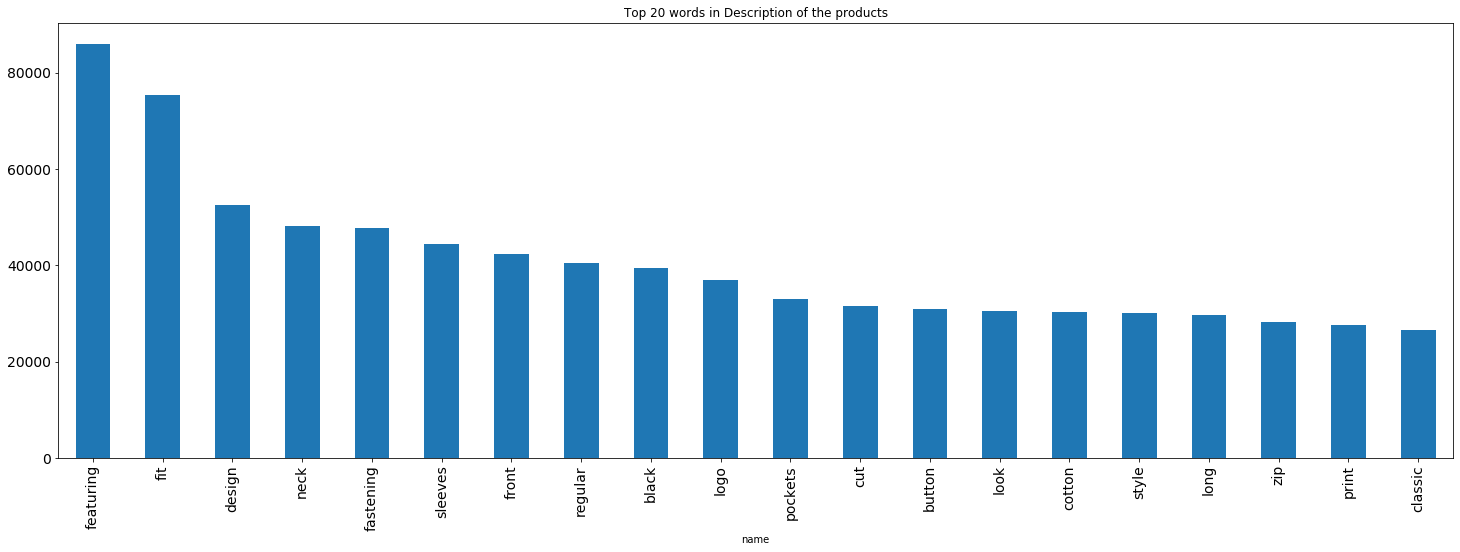

In [0]:
common_words = get_top_n_words(df['description_text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['name' , 'count'])
df1.groupby('name').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',figsize=(25,8), title='Top 20 words in Description of the products',fontsize=14)

In [0]:
fre_Descword=pd.DataFrame(common_words,columns =['Names','frequency'])
fre_Descword.head(2)

,Names,frequency
0,featuring,86023
1,fit,75500


In [0]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in fre_Descword['Names']: 
    val = str(val)   
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()     
    for words in tokens: 
      comment_words = comment_words + words + ' '

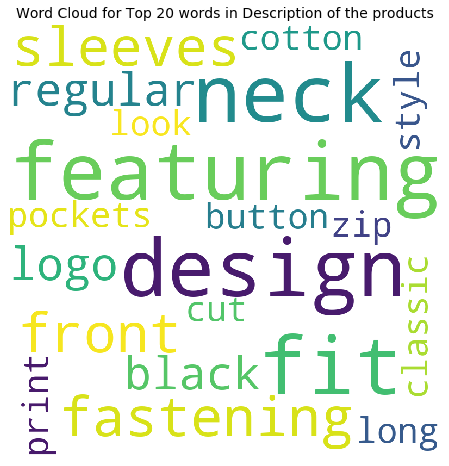

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('Word Cloud for Top 20 words in Description of the products',fontsize=14)
plt.axis("off") 
plt.show()